In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils import fourier as ft

In [ ]:
# for filename in os.listdir("./data/test"):
#     file_path = os.path.join("./data/test", filename)
img = cv2.imread("5.34.5.png", cv2.IMREAD_GRAYSCALE)
spectrum = ft.calculate_dft2(img)
ft.plot_2d_ft_spectrum(spectrum)

In [ ]:
low_pass_spectrum = ft.apply_2d_low_pass_filter(spectrum, threshold=30)
ft.plot_2d_ft_spectrum(low_pass_spectrum)

In [ ]:
image = ft.calculate_idft2(low_pass_spectrum)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image)
plt.show()

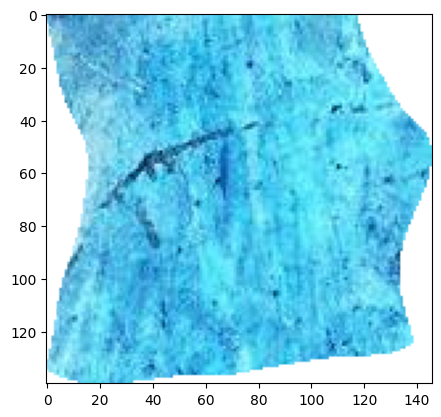

In [3]:
img = cv2.imread("5.34.5.png", cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

TypeError: Invalid shape (137, 123, 2) for image data

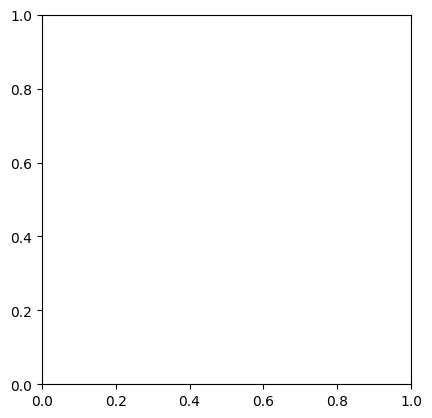

In [4]:
def custom_alpha_hsv(input_image):
    b, g, r, a = cv2.split(input_image)
    bgr_image = cv2.merge((b, g, r))
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    return cv2.merge((gray_image, a))

img1 = cv2.imread("5.34.33.png", flags=cv2.IMREAD_UNCHANGED)
img1 = custom_alpha_hsv(img1)
plt.imshow(img1)
plt.show()

print(img1.shape)
print(img1)

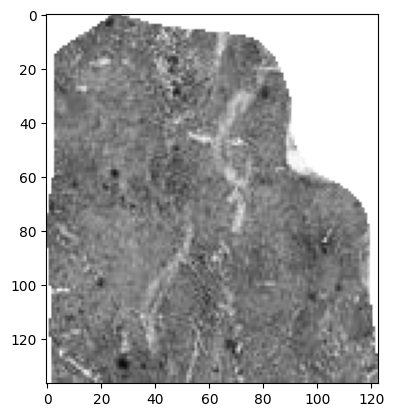

(137, 123, 4)

In [9]:
img1 = cv2.imread("5.34.33.png", flags=cv2.IMREAD_UNCHANGED)
b, g, r, a = cv2.split(img1)
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
rgb_image = np.dstack((gray_image, gray_image, gray_image, a))
plt.imshow(rgb_image)
plt.show()
rgb_image.shape

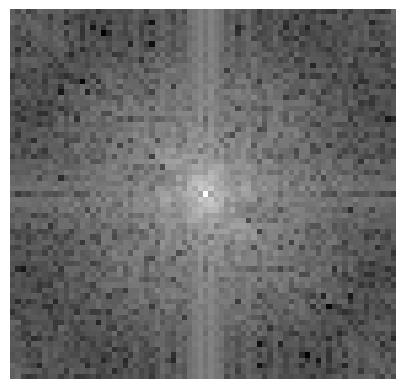

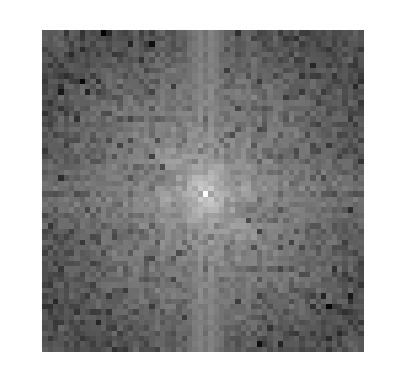

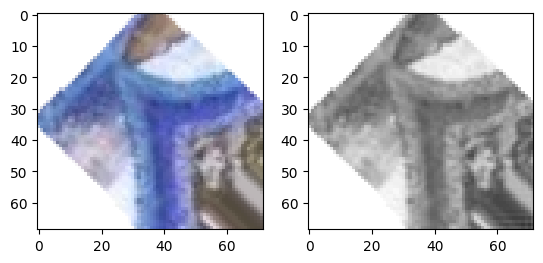

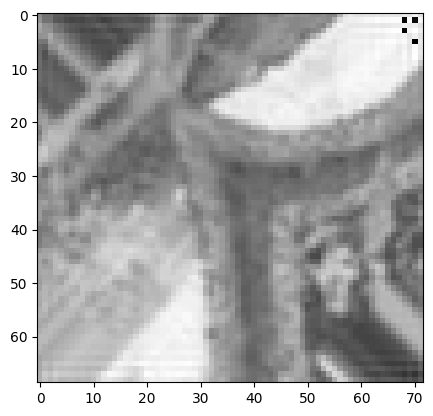

In [25]:
img = cv2.imread("5.32.38.png", cv2.IMREAD_UNCHANGED)
b, g, r, a = cv2.split(img)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

spectrum = ft.calculate_dft2(gray_image)
ft.plot_2d_ft_spectrum(spectrum)
low_pass_spectrum = ft.apply_2d_low_pass_filter(spectrum, threshold=30)
ft.plot_2d_ft_spectrum(low_pass_spectrum)

image = ft.calculate_idft2(low_pass_spectrum).astype(np.uint8)
rgb_image = np.dstack((image, image, image, a))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(rgb_image)
plt.show()

rgb_image2 = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb_image2)
plt.show()